In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

# Reading reviews data

In [3]:
reviews = pd.read_csv("Final data/reviews.csv")

In [4]:
reviews.head(1)

,Unnamed: 0,review,id,sku,reviewer,name,aboutMe,rating,title,comment,submissionTime
0,0,NaN,24122,8149167,\r\r\n,NaN,NaN,5.0,AWESOME,The best yet! They came correct as usual! Pimp C Forever!,2007-08-10T07:42:00


In [5]:
reviews.drop(['Unnamed: 0','review','reviewer','name','aboutMe','submissionTime'],axis = 1,inplace=True)

In [6]:
pd.set_option('display.max_colwidth', -1)
reviews.head()

,id,sku,rating,title,comment
0,24122,8149167,5.0,AWESOME,The best yet! They came correct as usual! Pimp C Forever!
1,24145,8487032,5.0,Essential for any jazz fan,"Bottom line: Buy all of the Jazz Icons titles. Starting with the Brubeck, this series is the pinnacle of jazz on DVD. The biggest stars in their prime, all of them beautifully shot and with gorgeous sound. Anyone remotely interested in American music needs to have the whole series, starting with the Brubeck, though the boxed sets are the best value overall."
2,24165,8381538,4.0,Action? Check! Stunning visuals? Check!,Absolutely amazing special effects and cinematography...Don't be surprised by the ending as this has been chronicled in history :)
3,24308,6287804,4.0,Lives upto the expectations,"While it would be hard for any movie to top the original Matrix, this movie attempts to do so. On some levels, it is the best Matrix movie yet. It goes out with a bang. Without ruining the ending, I will say that it is a climactic experience, and keeps you pinned to your seat thirsty for more every step of the way. This movie, as well as the previous 2, belong in the collections of action fans everywhere."
4,24411,4307084,4.0,Great Game,"While this is an old game, and does not have amazing graphics it has great long lived playablity. This is a game that if you are not to familiar with gaming, and don't want to spend HOURS learning which special key does what you can pick up in about 30 minutes and be hacking and slashing with the best of them."


In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221771 entries, 0 to 221770
Data columns (total 5 columns):
id         221771 non-null int64
sku        221771 non-null int64
rating     221771 non-null float64
title      221766 non-null object
comment    221769 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 8.5+ MB


In [8]:
len(reviews.sku.unique())

28661

# EDA

Text(0.5, 1.0, 'Distribution')

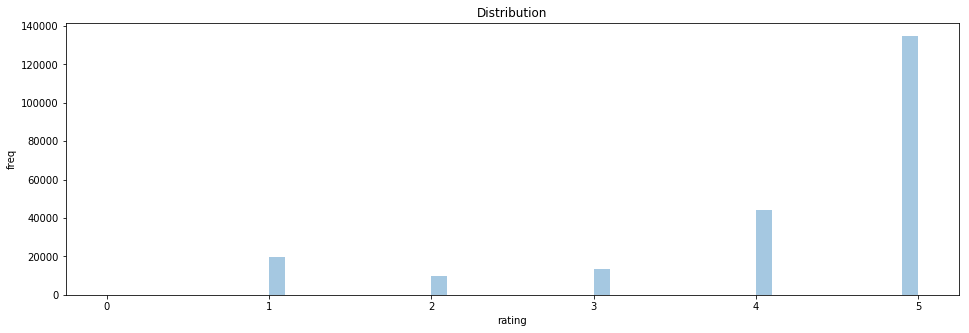

In [9]:
## Distribution Plots 
%matplotlib inline
plt.figure(figsize = (16,5))
sns.distplot(reviews.rating,kde = False)    
plt.ylabel('freq')
plt.title('Distribution')

In [10]:
# lets see why 5 is high
reviews[['sku','rating']].groupby(['sku','rating']).count()
x = reviews[['sku','rating']]
x['flag'] = 1

In [11]:
y = x.groupby(['sku','rating']).count()
y.head()

flag
sku    rating      
48530  4.0     1   
       5.0     1   
127687 5.0     5   
150115 1.0     1   
       5.0     1

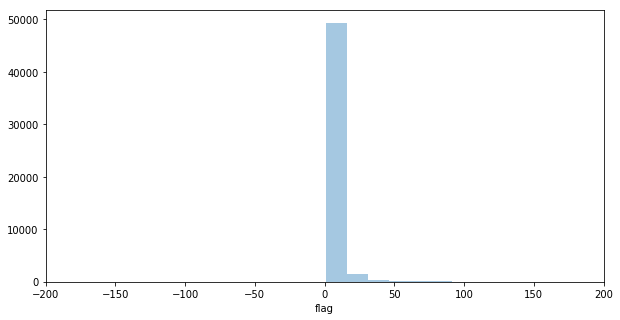

In [12]:
plt.figure(figsize = (10,5))
sns.distplot(y.flag,kde = False)  
plt.xlim(-200,200)
plt.show()

In [13]:
y.reset_index(inplace=True)

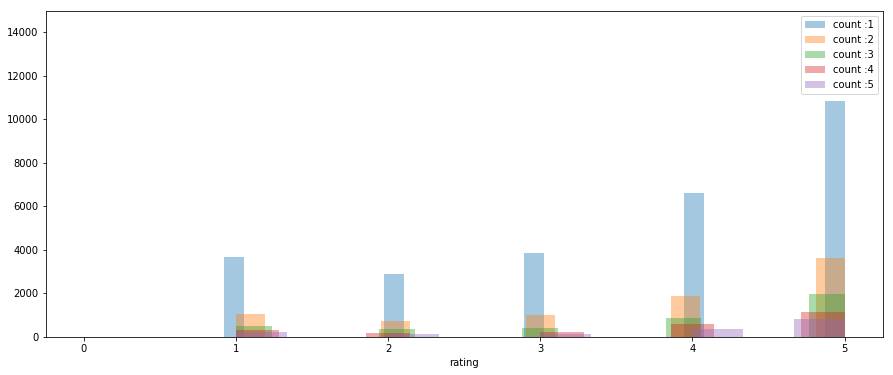

In [14]:
#Lets see how many are 5 among count 1
%matplotlib inline
plt.figure(figsize = (15,6))
for i in [1,2,3,4,5]:
    z = y[y.flag == i]
    sns.distplot(z.rating,kde = False,label=("count :" + str(i) ))
    plt.legend()
    plt.ylim(0,15000)


# We can clearly see that less numeber of ratings has 5 in the majority

## lets see how many rating each SKU has received

In [15]:
# lets see how many rating each user has given
x = pd.DataFrame(reviews.sku.value_counts())
x = x.reset_index()
x.columns = ['sku','count']

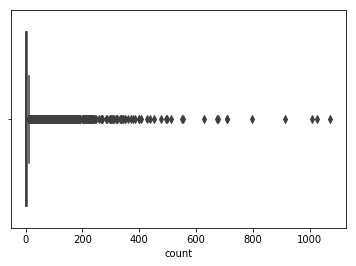

In [16]:
sns.boxplot('count',data = x,)

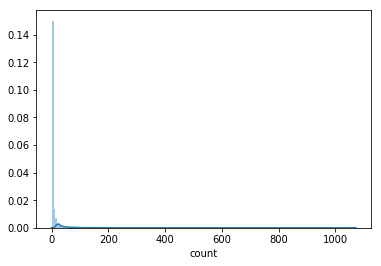

In [17]:
sns.distplot(x['count'],bins = 200)


In [18]:
import thinkstats2
import thinkplot

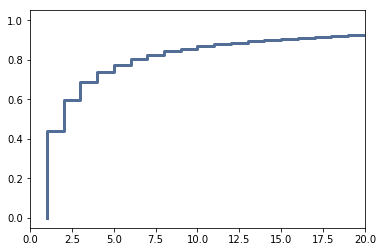

In [19]:
cdf = thinkstats2.Cdf(x['count'])
thinkplot.Cdf(cdf)
plt.xlim(0,20)
plt.show()

In [20]:
## lets filter some sku with very less reviews, form above chart we can see that more than 50 % data has less than 2 count lets take skus more than 5 counts
x = pd.DataFrame(reviews.sku.value_counts())
x = x.reset_index()
x.columns = ['sku','count']
y = x[x['count']>=5]


In [21]:
reviews.head()

,id,sku,rating,title,comment
0,24122,8149167,5.0,AWESOME,The best yet! They came correct as usual! Pimp C Forever!
1,24145,8487032,5.0,Essential for any jazz fan,"Bottom line: Buy all of the Jazz Icons titles. Starting with the Brubeck, this series is the pinnacle of jazz on DVD. The biggest stars in their prime, all of them beautifully shot and with gorgeous sound. Anyone remotely interested in American music needs to have the whole series, starting with the Brubeck, though the boxed sets are the best value overall."
2,24165,8381538,4.0,Action? Check! Stunning visuals? Check!,Absolutely amazing special effects and cinematography...Don't be surprised by the ending as this has been chronicled in history :)
3,24308,6287804,4.0,Lives upto the expectations,"While it would be hard for any movie to top the original Matrix, this movie attempts to do so. On some levels, it is the best Matrix movie yet. It goes out with a bang. Without ruining the ending, I will say that it is a climactic experience, and keeps you pinned to your seat thirsty for more every step of the way. This movie, as well as the previous 2, belong in the collections of action fans everywhere."
4,24411,4307084,4.0,Great Game,"While this is an old game, and does not have amazing graphics it has great long lived playablity. This is a game that if you are not to familiar with gaming, and don't want to spend HOURS learning which special key does what you can pick up in about 30 minutes and be hacking and slashing with the best of them."


In [22]:
df = y.merge(reviews,on = 'sku',how = 'inner')

In [23]:
df.drop('count',axis=1,inplace=True)

In [24]:
reviews.columns

Index(['id', 'sku', 'rating', 'title', 'comment'], dtype='object')

In [25]:
df.drop_duplicates(subset=['id', 'sku', 'rating', 'title', 'comment'],inplace=True)


In [26]:
df.shape

(186504, 5)

# Lets Read Some of the Customers Reviews

In [27]:
df.sort_values(by = 'rating').head(10)

,sku,id,rating,title,comment
161529,6770906,119374,0.0,NaN,NaN
0,1208844,3235310,1.0,Do not buy,"I accidentally bought this before realizing I swore never to buy netgear again. As with my prior netgear experience four years ago, installation was a nightmare. The setup software couldnt even get past the first stage. After getting dropped twice by telephone customer support, everything went unceremoniously into a garbage bag to be taken back to Best Buy. Cnet rates this as poor as well."
49799,1117121,6403435,1.0,Only works with Apple products,"So I bought these headphones thinking the sound would be as amazing as the Bose Earbud headphones. I was very disappointed. I called customer service when I could barely hear sound from the headphones when plugged into my 2 month old laptop. Customer service told me to plug it into my ipod and the sound was just great! Why make a headphone that only works with a specific music device? For ipod, ipad, or iphone users, buy it. Everyone else, look at something else like te bose earbud headphones."
49796,1117121,6387048,1.0,Comfortable and....that's it.,"I'm really baffled by the positive reviews for these. The demo headphones weren't working in store but I was impressed by the comfort and figured Bose headphones must have nice sound right? Wrong. It was tinny, shrill, and had absolutely no bass. It seems like all detail and focus was on the highs with the lows completely ignored. They're useless for any rock that isn't elevator music and forget about other genres like rap or techno. I know some people say headphones need to be burned in, but these were so far away from the kind of sound I wanted that I simply returned them the next day. Most of what I listen to is rock ranging from classics to pop-punk and other semi alternative rock. For the price, there are much better headphones out there - in Best Buy alone the Klipsch Image One and Skullcandy Aviators have far superior sound for similar price."
155036,4854179,7065573,1.0,Terrible Picture Quality,"I have 4 Samsung TV's in the house and this one was the worst picture quality but had the best Moster Cables attached to it. The picture was not sharp at all. When watching a Blu-Ray on the TV the lettering at any menu I had going was very noticeably grainy and just not clear. I ended up getting the 60"" 7500 series instead which was 300 more at the time but worth the money sine you have to look at it everyday for atleast 3 years. Also another downfall for me was that it was almost 4"" thick and it only had 1 HDMI Cable. So if you don't connect this via a receiver and have more than 1 HDMI Input you are out of luck unless you enjoy swapping out the connection. So overall it was not a great buy in general when you take into consideration the picture quality, the limited connections available and the thickness."
155040,4854179,7338711,1.0,The picture quality is pretty bad on this TV.,"I really didn't enjoy the picture quality on this TV. I didn't really shop around for a TV, it was late and compared to the one I had originally wanted the price was $200.00 difference, and the tech told me the only difference was the technology. (It was a smart TV) I think that I'll spend the extra $200 and go for the TV with the better picture."
49773,1117121,5957416,1.0,AVOID,"If you are looking for bass, this is not for you. there is no bass what so ever on the bose ae. the sound is not great not even for $150. i bought the sony MDR-XB500 for $50 and it sound way better than this bose. will be returnig. i guess i was paying $150 for a name."
49747,1117121,4244087,1.0,Avoid!,"I really wanted to own a pair of Bose and I though these might be it. They sounded good in the store but not so good when I got them home. Very hollow sound, no bass impact and lifeless. Even a headphone amp didn't help. There are a lot better options out there including the Grado SR80's and they are only $100. These are $50 phones at best. With Bose, you pay for their marketing and advertis

In [28]:
df.sort_values(by = 'rating').tail(10)

,sku,id,rating,title,comment
75480,9707935,2439099,5.0,funnnn,ppl need to get this game all the modes are fun and well it is the best sport in the world
75491,9707935,2440434,5.0,A must have for all MMA fans!!,"THQ and UFC hit the nail on the head this year, with finally adding in the use of the cage, and now online Camps!! The only negative in my opinion is the fact PS3 only are able to play with legends such as Royce Gracie and Dan Severn."
75493,9707935,2440933,5.0,Simply outstanding!!!!,"overall this is a great game, it has kept me busy for hours and hours on en in the career mode with the huge numbers of customizables and fighting styles theres always something to do whether it be sparring between fight or working on a new move it will keep you going! some of the actions though can get alittle repeditive though and you have to pay extra to use the online section of it, also it WILL take you HOURS to learn how to effectively play this game!! but overall this game is the best combat game I've ever seen and is lots of fun for me and my friends"
75494,9707935,2440956,5.0,Best Fighting Game Out There,This is definitely a must buy game. You dont have to be a UFC fan to enjoy this game.
75495,9707935,2440959,5.0,buy it,this game is awesome i would recommend it to any one if you liked 2009 you'll love this one online is great you should buy it now...... do it now!!!!!
75496,9707935,2441024,5.0,Simply Awesome!!!!,"Most sports games just add a couple of tweaks to their annual edition, but THQ listened to it's fans and tweaked the whole darn game for the better. Granted, for newer players, there may be a steep learning curve, but if you're a fan of the sport you won't care. This game is simply fantastic. Now, to be honest the online play is laggy. This should be fixed though pretty quickly. Do not let that deter you from getting this game though. The single player content alone is enought to justify the purchase price. Great job THQ!!!"
75497,9707935,2441619,5.0,Definite upgrade over 2009 version!! Love it!!,Great game. Big UFC fan here and now i get to use all of my favs in this new game. To bad no Randy Couture though. Guess I will just have to create him. Create a fighter is updated and is much improved. Now u can give ur figter full back tats and all. Clinching against the cage is awesome and love the crucifix/salverry position for ground and pound. Great game hopefully the have updates to put in some of the fighters that were left out this year!! Must buy for all mma fans and fight fan gamers!!
75498,9707935,2441841,5.0,Best fighting game yet!,"I think that this game is a huge improvement from Undisputed 2009, but 2009 was a hit! That says a lot about this game. It is a must have. There was a lot of work done on the improvements of this game and you can tell. From the new fight stances, to all the new moves, and most of all the new game modes such as Title defense etc., makes this a great game! Must have for all fight fans!"
75492,9707935,2440536,5.0,Great Game,"UFC 2010 is the game that you need to purchase if you like online play as well as offline play. This game will keep you entertain for a long time, due to the new career mode that is more realistic with decay attributes. You can create your own fight camp and invite your friends and family, so that you can train and spar against each other. This game is one of a kind, I love it and I know you will too."
186503,8124683,2019715,5.0,the return of the godfather of rap music,awesome cd by the godfather of rap music!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


### Pre-processing text data

### Remove punctuation

In [43]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
def remove_punc(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

In [45]:
df['clean_title'] = df.title.apply(lambda x: remove_punc(str(x)))
df['clean_comment'] = df.comment.apply(lambda x: remove_punc(str(x)))
df.head()

,sku,id,rating,title,comment,length_title,length_comment,punc%_title,punc%_comment,clean_title,clean_comment
0,1208844,3235310,1.0,Do not buy,"I accidentally bought this before realizing I swore never to buy netgear again. As with my prior netgear experience four years ago, installation was a nightmare. The setup software couldnt even get past the first stage. After getting dropped twice by telephone customer support, everything went unceremoniously into a garbage bag to be taken back to Best Buy. Cnet rates this as poor as well.",10,392,0.0,2.1,Do not buy,I accidentally bought this before realizing I swore never to buy netgear again As with my prior netgear experience four years ago installation was a nightmare The setup software couldnt even get past the first stage After getting dropped twice by telephone customer support everything went unceremoniously into a garbage bag to be taken back to Best Buy Cnet rates this as poor as well
1,1208844,3243408,5.0,Swells speed.,Good speed this replaced my older modem be ause I wanted to down load net flicks. It does it perfectly. Inhaven't noticed a huge increase in range but speed advantage. I would recommend i,13,187,8.3,2.6,Swells speed,Good speed this replaced my older modem be ause I wanted to down load net flicks It does it perfectly Inhavent noticed a huge increase in range but speed advantage I would recommend i
2,1208844,3270324,4.0,GREAT ROUTER,"I've had this router for a month now. It works great !! Much better than the Belkin it replaced. No problems at all!! I use it to handle the lap top, the wireless desktop, and the PS3 (wired). No disconnects, no problems when I'm gaming, wife on desktop, and laptop logged on to enternet. All at the same time. I love it!!!!!!!!!!",12,330,0.0,10.4,GREAT ROUTER,Ive had this router for a month now It works great Much better than the Belkin it replaced No problems at all I use it to handle the lap top the wireless desktop and the PS3 wired No disconnects no problems when Im gaming wife on desktop and laptop logged on to enternet All at the same time I love it
3,1208844,3279348,1.0,Poor customer support!,"Bought this router 7 months ago because I have up to 4 computers going in my home and was told this was one of NetGear's best premium routers and would have no problems. Had no problems for the first 6 months but magically as soon as my 6 month warranty lapsed the router slowed down to dial up speed whether I had 1 or 4 computers on line. Was told by the NetGear customer service that this happened regularly and I had to purchase 6 month($69.99) or 12 month($99.99) service contract so they could reconfigure my wireless software. Said their soft ware was continually ""going out of date"" and this service contract was necessary. Was told by one of my IT buddies that NetGear has these time activated software issues to force you to purchase their service contract. I can buy a new dual band router for less than their service contract. Don't buy this because NetGear has planned obsolence bult into their router's software. Buy Belkin or others with better CS. Won't stand behind their product. Disgruntled in Atlanta",22,1020,5.0,2.7,Poor customer support,Bought this router 7 months ago because I have up to 4 computers going in my home and was told this was one of NetGears best premium routers and would have no problems Had no problems for the first 6 months but magically as soon as my 6 month warranty lapsed the router slowed down to dial up speed whether I had 1 or 4 computers on line Was told by the NetGear customer service that this happened regularly and I had to purchase 6 month6999 or 12 month9999 service contract so they could reconfigure my wireless software Said their soft ware was continually going out of date and this service contract was necessary Was told by one of my IT buddies that NetGear has these time activated software issues to force you to purchase their service contract I can buy a new dual band router for less than their ser

### Tokenization

In [46]:
import re

def tokenize(text):
    tokens = re.split("\W+",text)
    return tokens

In [47]:
df['title_token'] = df.title.apply(lambda x: tokenize(str(x).lower()))
df['comment_token'] = df.comment.apply(lambda x: tokenize(str(x).lower()))

In [48]:
df.head(2)

,sku,id,rating,title,comment,length_title,length_comment,punc%_title,punc%_comment,clean_title,clean_comment,title_token,comment_token
0,1208844,3235310,1.0,Do not buy,"I accidentally bought this before realizing I swore never to buy netgear again. As with my prior netgear experience four years ago, installation was a nightmare. The setup software couldnt even get past the first stage. After getting dropped twice by telephone customer support, everything went unceremoniously into a garbage bag to be taken back to Best Buy. Cnet rates this as poor as well.",10,392,0.0,2.1,Do not buy,I accidentally bought this before realizing I swore never to buy netgear again As with my prior netgear experience four years ago installation was a nightmare The setup software couldnt even get past the first stage After getting dropped twice by telephone customer support everything went unceremoniously into a garbage bag to be taken back to Best Buy Cnet rates this as poor as well,"[do, not, buy]","[i, accidentally, bought, this, before, realizing, i, swore, never, to, buy, netgear, again, as, with, my, prior, netgear, experience, four, years, ago, installation, was, a, nightmare, the, setup, software, couldnt, even, get, past, the, first, stage, after, getting, dropped, twice, by, telephone, customer, support, everything, went, unceremoniously, into, a, garbage, bag, to, be, taken, back, to, best, buy, cnet, rates, this, as, poor, as, well, ]"
1,1208844,3243408,5.0,Swells speed.,Good speed this replaced my older modem be ause I wanted to down load net flicks. It does it perfectly. Inhaven't noticed a huge increase in range but speed advantage. I would recommend i,13,187,8.3,2.6,Swells speed,Good speed this replaced my older modem be ause I wanted to down load net flicks It does it perfectly Inhavent noticed a huge increase in range but speed advantage I would recommend i,"[swells, speed, ]","[good, speed, this, replaced, my, older, modem, be, ause, i, wanted, to, down, load, net, flicks, it, does, it, perfectly, inhaven, t, noticed, a, huge, increase, in, range, but, speed, advantage, i, would, recommend, i]"


### Remove stopwords

In [49]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')

In [51]:
stopwords[1:10]

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [52]:
def remove_stopword(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text

In [53]:
df['title_token_nostop'] = df.title_token.apply(lambda x: remove_stopword(x))
df['comment_token_nostop'] = df.comment_token.apply(lambda x: remove_stopword(x))

In [54]:
df.head(2)

,sku,id,rating,title,comment,length_title,length_comment,punc%_title,punc%_comment,clean_title,clean_comment,title_token,comment_token,title_token_nostop,comment_token_nostop
0,1208844,3235310,1.0,Do not buy,"I accidentally bought this before realizing I swore never to buy netgear again. As with my prior netgear experience four years ago, installation was a nightmare. The setup software couldnt even get past the first stage. After getting dropped twice by telephone customer support, everything went unceremoniously into a garbage bag to be taken back to Best Buy. Cnet rates this as poor as well.",10,392,0.0,2.1,Do not buy,I accidentally bought this before realizing I swore never to buy netgear again As with my prior netgear experience four years ago installation was a nightmare The setup software couldnt even get past the first stage After getting dropped twice by telephone customer support everything went unceremoniously into a garbage bag to be taken back to Best Buy Cnet rates this as poor as well,"[do, not, buy]","[i, accidentally, bought, this, before, realizing, i, swore, never, to, buy, netgear, again, as, with, my, prior, netgear, experience, four, years, ago, installation, was, a, nightmare, the, setup, software, couldnt, even, get, past, the, first, stage, after, getting, dropped, twice, by, telephone, customer, support, everything, went, unceremoniously, into, a, garbage, bag, to, be, taken, back, to, best, buy, cnet, rates, this, as, poor, as, well, ]",[buy],"[accidentally, bought, realizing, swore, never, buy, netgear, prior, netgear, experience, four, years, ago, installation, nightmare, setup, software, couldnt, even, get, past, first, stage, getting, dropped, twice, telephone, customer, support, everything, went, unceremoniously, garbage, bag, taken, back, best, buy, cnet, rates, poor, well, ]"
1,1208844,3243408,5.0,Swells speed.,Good speed this replaced my older modem be ause I wanted to down load net flicks. It does it perfectly. Inhaven't noticed a huge increase in range but speed advantage. I would recommend i,13,187,8.3,2.6,Swells speed,Good speed this replaced my older modem be ause I wanted to down load net flicks It does it perfectly Inhavent noticed a huge increase in range but speed advantage I would recommend i,"[swells, speed, ]","[good, speed, this, replaced, my, older, modem, be, ause, i, wanted, to, down, load, net, flicks, it, does, it, perfectly, inhaven, t, noticed, a, huge, increase, in, range, but, speed, advantage, i, would, recommend, i]","[swells, speed, ]","[good, speed, replaced, older, modem, ause, wanted, load, net, flicks, perfectly, inhaven, noticed, huge, increase, range, speed, advantage, would, recommend]"


### Stemming or lemmatizing

In [55]:
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()


In [56]:
print(ps.stem('run'))
print(ps.stem('running'))
print(ps.stem('runner'+"\n"))
print(wn.lemmatize('run'))
print(wn.lemmatize('running'))
print(wn.lemmatize('runner'+"\n"))
print(ps.stem('meanness'))
print(ps.stem('meaning'+"\n"))
print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning'))

run
run
runner

run
running
runner

mean
meaning

meanness
meaning


In [57]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text
def lemmatizer(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

In [58]:
df['title_token_nostop_stemmed'] = df.title_token_nostop.apply(lambda x: stemming(x))
df['comment_token_nostop_stemmed'] = df.comment_token_nostop.apply(lambda x: stemming(x))

In [59]:
df['title_token_nostop_lemm'] = df.title_token_nostop.apply(lambda x: lemmatizer(x))
df['comment_token_nostop_lemm'] = df.comment_token_nostop.apply(lambda x: lemmatizer(x))

In [60]:
df.head()

,sku,id,rating,title,comment,length_title,length_comment,punc%_title,punc%_comment,clean_title,clean_comment,title_token,comment_token,title_token_nostop,comment_token_nostop,title_token_nostop_stemmed,comment_token_nostop_stemmed,title_token_nostop_lemm,comment_token_nostop_lemm
0,1208844,3235310,1.0,Do not buy,"I accidentally bought this before realizing I swore never to buy netgear again. As with my prior netgear experience four years ago, installation was a nightmare. The setup software couldnt even get past the first stage. After getting dropped twice by telephone customer support, everything went unceremoniously into a garbage bag to be taken back to Best Buy. Cnet rates this as poor as well.",10,392,0.0,2.1,Do not buy,I accidentally bought this before realizing I swore never to buy netgear again As with my prior netgear experience four years ago installation was a nightmare The setup software couldnt even get past the first stage After getting dropped twice by telephone customer support everything went unceremoniously into a garbage bag to be taken back to Best Buy Cnet rates this as poor as well,"[do, not, buy]","[i, accidentally, bought, this, before, realizing, i, swore, never, to, buy, netgear, again, as, with, my, prior, netgear, experience, four, years, ago, installation, was, a, nightmare, the, setup, software, couldnt, even, get, past, the, first, stage, after, getting, dropped, twice, by, telephone, customer, support, everything, went, unceremoniously, into, a, garbage, bag, to, be, taken, back, to, best, buy, cnet, rates, this, as, poor, as, well, ]",[buy],"[accidentally, bought, realizing, swore, never, buy, netgear, prior, netgear, experience, four, years, ago, installation, nightmare, setup, software, couldnt, even, get, past, first, stage, getting, dropped, twice, telephone, customer, support, everything, went, unceremoniously, garbage, bag, taken, back, best, buy, cnet, rates, poor, well, ]",[buy],"[accident, bought, realiz, swore, never, buy, netgear, prior, netgear, experi, four, year, ago, instal, nightmar, setup, softwar, couldnt, even, get, past, first, stage, get, drop, twice, telephon, custom, support, everyth, went, unceremoni, garbag, bag, taken, back, best, buy, cnet, rate, poor, well, ]",[buy],"[accidentally, bought, realizing, swore, never, buy, netgear, prior, netgear, experience, four, year, ago, installation, nightmare, setup, software, couldnt, even, get, past, first, stage, getting, dropped, twice, telephone, customer, support, everything, went, unceremoniously, garbage, bag, taken, back, best, buy, cnet, rate, poor, well, ]"
1,1208844,3243408,5.0,Swells speed.,Good speed this replaced my older modem be ause I wanted to down load net flicks. It does it perfectly. Inhaven't noticed a huge increase in range but speed advantage. I would recommend i,13,187,8.3,2.6,Swells speed,Good speed this replaced my older modem be ause I wanted to down load net flicks It does it perfectly Inhavent noticed a huge increase in range but speed advantage I would recommend i,"[swells, speed, ]","[good, speed, this, replaced, my, older, modem, be, ause, i, wanted, to, down, load, net, flicks, it, does, it, perfectly, inhaven, t, noticed, a, huge, increase, in, range, but, speed, advantage, i, would, recommend, i]","[swells, speed, ]","[good, speed, replaced, older, modem, ause, wanted, load, net, flicks, perfectly, inhaven, noticed, huge, increase, range, speed, advantage, would, recommend]","[swell, speed, ]","[good, speed, replac, older, modem, aus, want, load, net, flick, perfectli, inhaven, notic, huge, increas, rang, speed, advantag, would, recommend]","[swell, speed, ]","[good, speed, replaced, older, modem, ause, wanted, load, net, flick, perfectly, inhaven, noticed, huge, increase, range, speed, advantage, would, recommend]"
2,1208844,3270324,4.0,GREAT ROUTER,"I've had this router for a month now. It works great !! Much better than the Belkin it replaced. No problems at all!! I use it to handle the lap 

We can see the difference between stem and lemm fields

Frequency plots for low rating

In [61]:
low_rat = df[df.rating == 1].title_token_nostop_lemm


In [62]:

title_lemm_dict = {}
for x in low_rat:
    for word in x :
        if word is not "":
            if word not in title_lemm_dict.keys():
                title_lemm_dict[word] = 1
            else :
                title_lemm_dict[word] = title_lemm_dict[word] +1

In [63]:
x= pd.DataFrame.from_dict(title_lemm_dict,orient='index').reset_index()

In [64]:
x.columns = ['word','count']

In [65]:
x = x.sort_values(by='count',ascending=False)
x.head(20)

,word,count
0,buy,1221
29,work,918
97,money,864
1,poor,757
117,product,698
114,good,665
92,worst,664
115,waste,650
20,terrible,606
63,bad,566


In [66]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


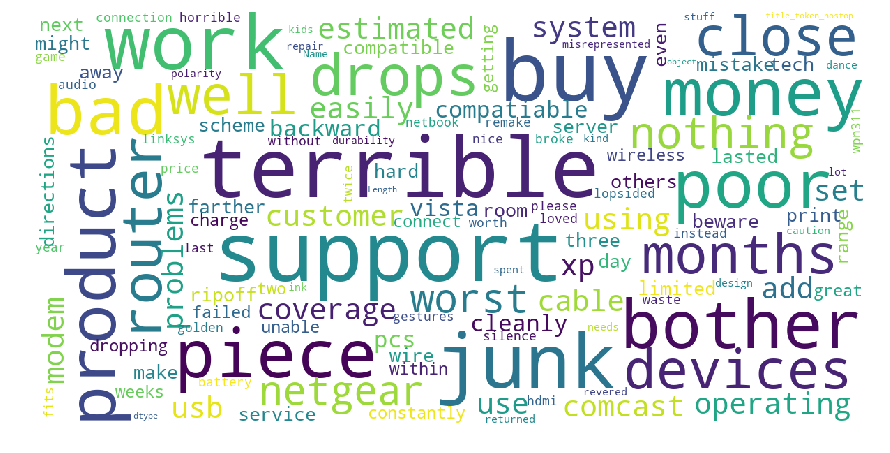

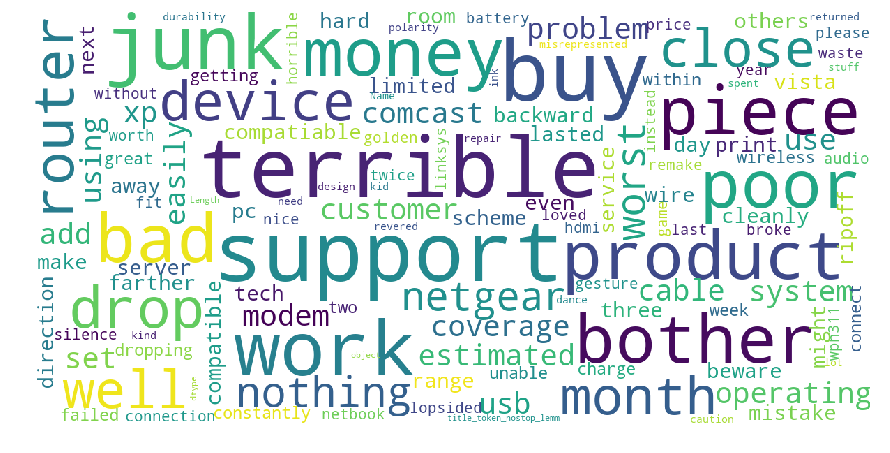

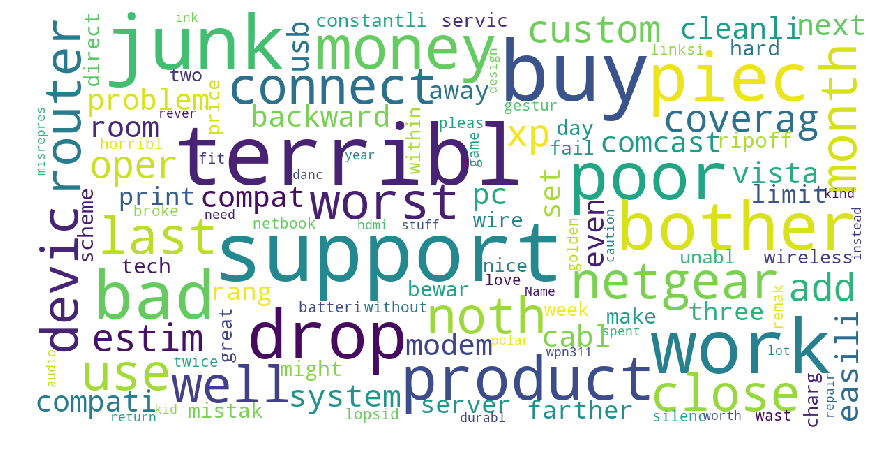

In [67]:
show_wordcloud(df[df.rating==1].title_token_nostop)
show_wordcloud(df[df.rating==1].title_token_nostop_lemm)
show_wordcloud(df[df.rating==1].title_token_nostop_stemmed)

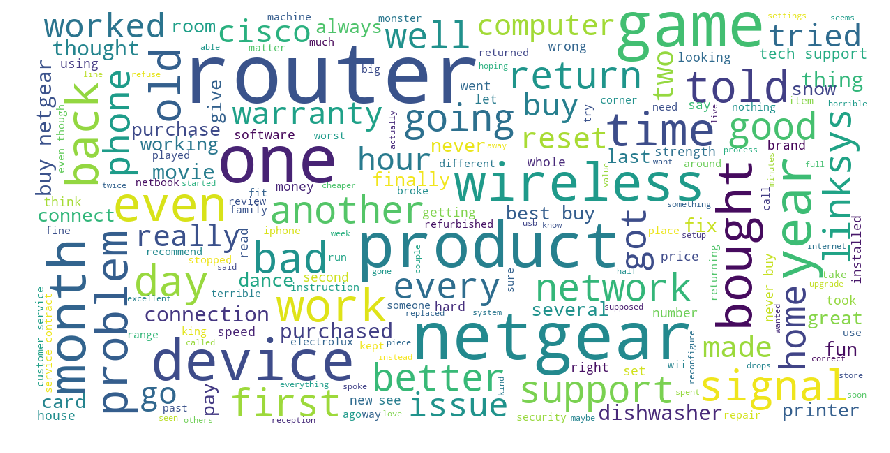

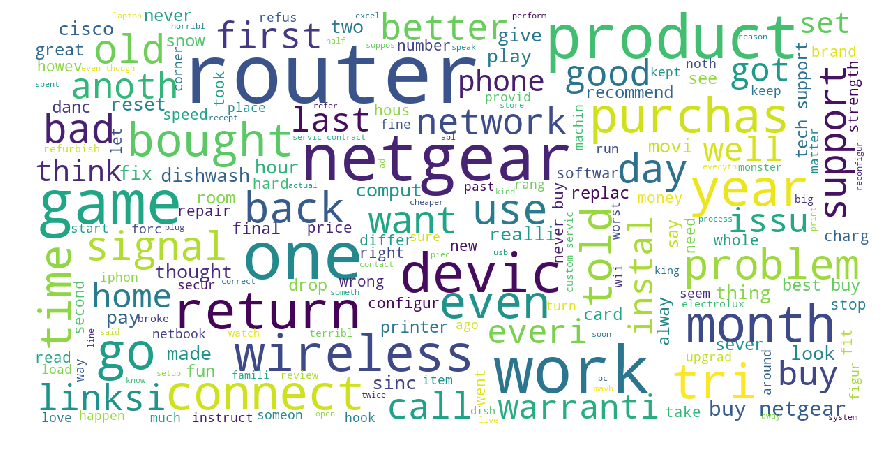

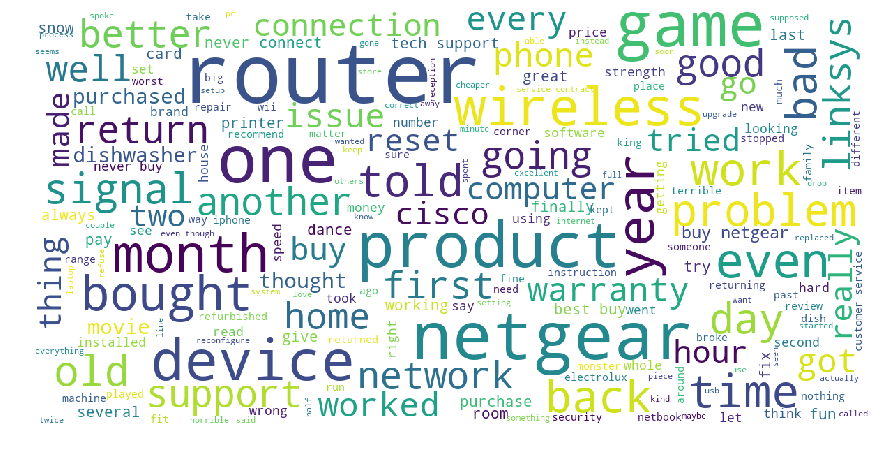

In [68]:
show_wordcloud(df[df.rating==1].comment_token_nostop)
show_wordcloud(df[df.rating==1].comment_token_nostop_stemmed)
show_wordcloud(df[df.rating==1].comment_token_nostop_lemm)

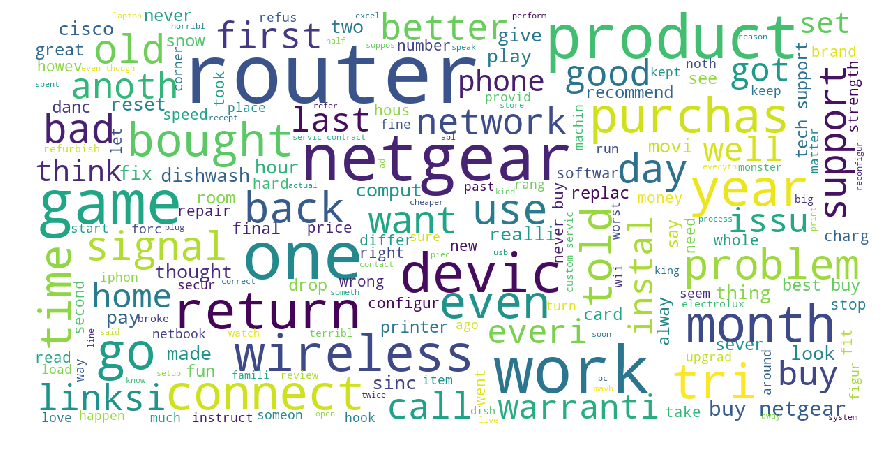

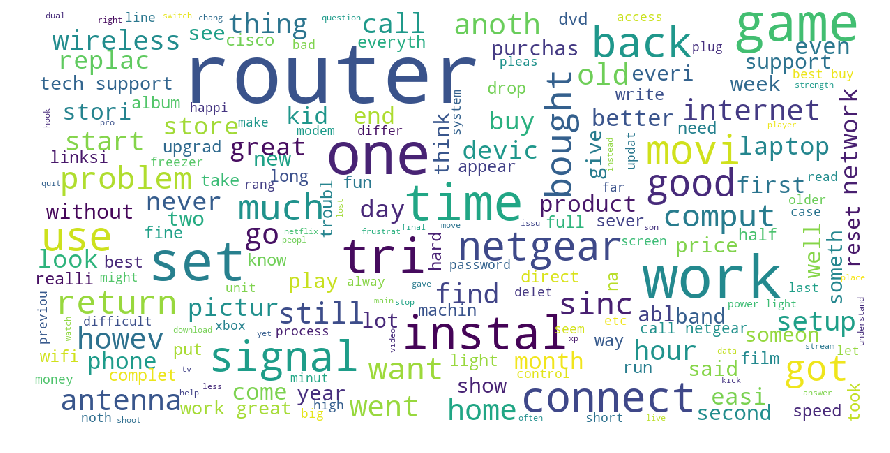

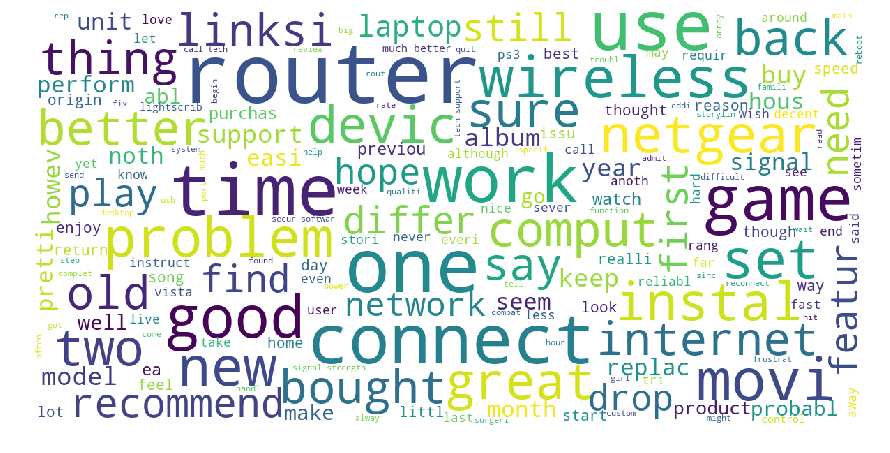

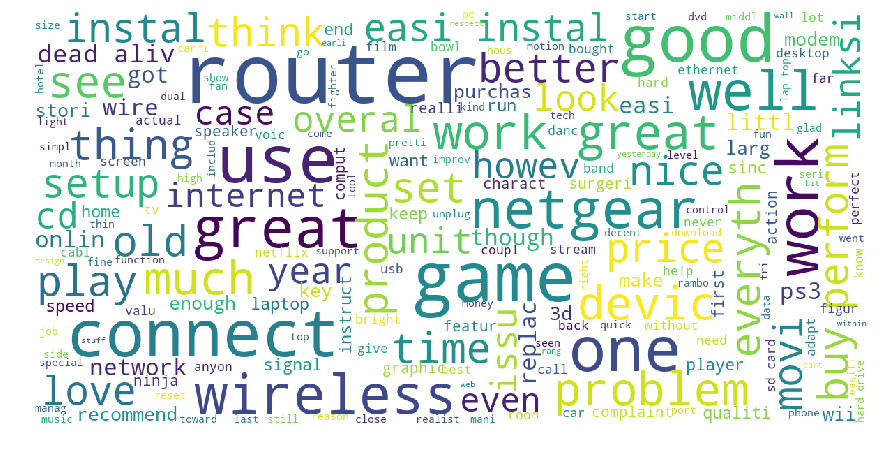

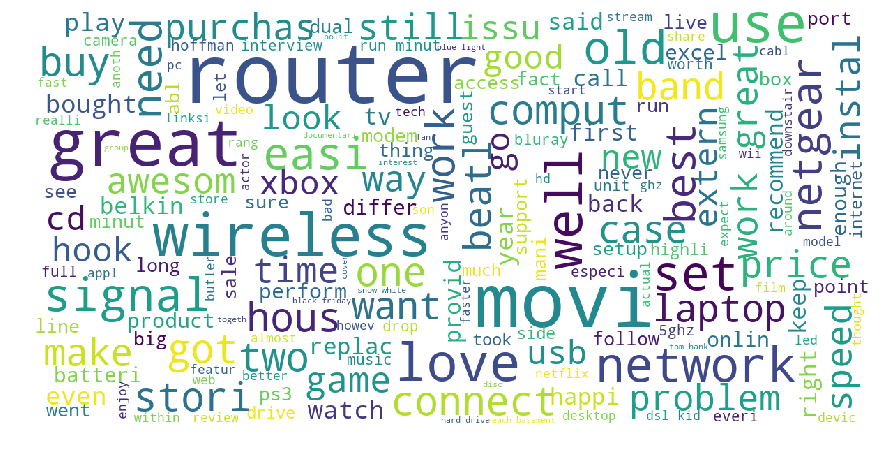

In [69]:
for i in [1,2,3,4,5]:
    show_wordcloud(df[df.rating==i].comment_token_nostop_stemmed)



# Preparing data for Model

In [70]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
    return text

df['cleaned_title'] = df.title.apply(lambda x: clean_text(str(x)))
df['cleaned_comment'] = df.comment.apply(lambda x: clean_text(str(x)))
df.head()

,sku,id,rating,title,comment,length_title,length_comment,punc%_title,punc%_comment,clean_title,...,title_token,comment_token,title_token_nostop,comment_token_nostop,title_token_nostop_stemmed,comment_token_nostop_stemmed,title_token_nostop_lemm,comment_token_nostop_lemm,cleaned_title,cleaned_comment
0,1208844,3235310,1.0,Do not buy,"I accidentally bought this before realizing I swore never to buy netgear again. As with my prior netgear experience four years ago, installation was a nightmare. The setup software couldnt even get past the first stage. After getting dropped twice by telephone customer support, everything went unceremoniously into a garbage bag to be taken back to Best Buy. Cnet rates this as poor as well.",10,392,0.0,2.1,Do not buy,...,"[do, not, buy]","[i, accidentally, bought, this, before, realizing, i, swore, never, to, buy, netgear, again, as, with, my, prior, netgear, experience, four, years, ago, installation, was, a, nightmare, the, setup, software, couldnt, even, get, past, the, first, stage, after, getting, dropped, twice, by, telephone, customer, support, everything, went, unceremoniously, into, a, garbage, bag, to, be, taken, back, to, best, buy, cnet, rates, this, as, poor, as, well, ]",[buy],"[accidentally, bought, realizing, swore, never, buy, netgear, prior, netgear, experience, four, years, ago, installation, nightmare, setup, software, couldnt, even, get, past, first, stage, getting, dropped, twice, telephone, customer, support, everything, went, unceremoniously, garbage, bag, taken, back, best, buy, cnet, rates, poor, well, ]",[buy],"[accident, bought, realiz, swore, never, buy, netgear, prior, netgear, experi, four, year, ago, instal, nightmar, setup, softwar, couldnt, even, get, past, first, stage, get, drop, twice, telephon, custom, support, everyth, went, unceremoni, garbag, bag, taken, back, best, buy, cnet, rate, poor, well, ]",[buy],"[accidentally, bought, realizing, swore, never, buy, netgear, prior, netgear, experience, four, year, ago, installation, nightmare, setup, software, couldnt, even, get, past, first, stage, getting, dropped, twice, telephone, customer, support, everything, went, unceremoniously, garbage, bag, taken, back, best, buy, cnet, rate, poor, well, ]",buy,accident bought realiz swore never buy netgear prior netgear experi four year ago instal nightmar setup softwar couldnt even get past first stage get drop twice telephon custom support everyth went unceremoni garbag bag taken back best buy cnet rate poor well
1,1208844,3243408,5.0,Swells speed.,Good speed this replaced my older modem be ause I wanted to down load net flicks. It does it perfectly. Inhaven't noticed a huge increase in range but speed advantage. I would recommend i,13,187,8.3,2.6,Swells speed,...,"[swells, speed, ]","[good, speed, this, replaced, my, older, modem, be, ause, i, wanted, to, down, load, net, flicks, it, does, it, perfectly, inhaven, t, noticed, a, huge, increase, in, range, but, speed, advantage, i, would, recommend, i]","[swells, speed, ]","[good, speed, replaced, older, modem, ause, wanted, load, net, flicks, perfectly, inhaven, noticed, huge, increase, range, speed, advantage, would, recommend]","[swell, speed, ]","[good, speed, replac, older, modem, aus, want, load, net, flick, perfectli, inhaven, notic, huge, increas, rang, speed, advantag, would, recommend]","[swell, speed, ]","[good, speed, replaced, older, modem, ause, wanted, load, net, flick, perfectly, inhaven, noticed, huge, increase, range, speed, advantage, would, recommend]",swell speed,good speed replac older modem aus want load net flick perfectli inhav notic huge increas rang speed advantag would recommend
2,1208844,3270324,4.0,GREAT ROUTER,"I've had this router for a month now. It works great !! Much better than the Belkin it replaced. No problems at all!! I use it to handle the lap top, the wireless desktop, and the PS3 (wired). No disconnects, no problems when I'm gaming, wife on desktop, and laptop logged on to enterne

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect_titile = CountVectorizer()
count_vect_comment = CountVectorizer()

X_counts_title = count_vect_titile.fit_transform(df.cleaned_title.head(10))
X_counts_comment = count_vect_comment.fit_transform(df.cleaned_comment.head(10))
print(X_counts_title.shape)
print(count_vect_titile.get_feature_names())

print(X_counts_comment.shape)
print(count_vect_comment.get_feature_names())

(10, 19)
['buy', 'custom', 'download', 'excel', 'faster', 'game', 'gamer', 'great', 'mid', 'onlin', 'poor', 'price', 'qualiti', 'router', 'routergreat', 'speed', 'support', 'swell', 'yay']
(10, 248)
['12', '15', '20', '3400', '360', '3700', '55', '7500', 'accident', 'activ', 'advantag', 'ago', 'also', 'anoth', 'anyon', 'atlanta', 'aus', 'back', 'bad', 'bag', 'band', 'behind', 'belkin', 'best', 'better', 'bit', 'bother', 'bought', 'brainer', 'breez', 'bucket', 'buddi', 'bult', 'buy', 'call', 'cd', 'cnet', 'comput', 'connect', 'continu', 'contract', 'could', 'couldnt', 'cs', 'custom', 'date', 'desktop', 'dial', 'didnt', 'direct', 'disconnect', 'disgruntl', 'dont', 'drop', 'dual', 'eas', 'easi', 'end', 'enternet', 'essenti', 'ethernet', 'even', 'everyth', 'experi', 'fact', 'fairli', 'famili', 'final', 'first', 'flick', 'follow', 'forc', 'four', 'friend', 'function', 'game', 'gamer', 'garbag', 'gave', 'get', 'gigabit', 'girlfriend', 'go', 'good', 'googl', 'got', 'great', 'guid', 'half', 'h

# Analyze and cleaning the text columns

In [29]:
df['length_title'] = df['title'].apply(lambda x: len(str(x)))
df['length_comment'] = df['comment'].apply(lambda x: len(str(x)))

In [30]:
df.head()

,sku,id,rating,title,comment,length_title,length_comment
0,1208844,3235310,1.0,Do not buy,"I accidentally bought this before realizing I swore never to buy netgear again. As with my prior netgear experience four years ago, installation was a nightmare. The setup software couldnt even get past the first stage. After getting dropped twice by telephone customer support, everything went unceremoniously into a garbage bag to be taken back to Best Buy. Cnet rates this as poor as well.",10,392
1,1208844,3243408,5.0,Swells speed.,Good speed this replaced my older modem be ause I wanted to down load net flicks. It does it perfectly. Inhaven't noticed a huge increase in range but speed advantage. I would recommend i,13,187
2,1208844,3270324,4.0,GREAT ROUTER,"I've had this router for a month now. It works great !! Much better than the Belkin it replaced. No problems at all!! I use it to handle the lap top, the wireless desktop, and the PS3 (wired). No disconnects, no problems when I'm gaming, wife on desktop, and laptop logged on to enternet. All at the same time. I love it!!!!!!!!!!",12,330
3,1208844,3279348,1.0,Poor customer support!,"Bought this router 7 months ago because I have up to 4 computers going in my home and was told this was one of NetGear's best premium routers and would have no problems. Had no problems for the first 6 months but magically as soon as my 6 month warranty lapsed the router slowed down to dial up speed whether I had 1 or 4 computers on line. Was told by the NetGear customer service that this happened regularly and I had to purchase 6 month($69.99) or 12 month($99.99) service contract so they could reconfigure my wireless software. Said their soft ware was continually ""going out of date"" and this service contract was necessary. Was told by one of my IT buddies that NetGear has these time activated software issues to force you to purchase their service contract. I can buy a new dual band router for less than their service contract. Don't buy this because NetGear has planned obsolence bult into their router's software. Buy Belkin or others with better CS. Won't stand behind their product. Disgruntled in Atlanta",22,1020
4,1208844,3354697,4.0,"Quality, Mid price router","The wndr 3400 is a mid-range router with some pretty nifty high end qualities. Essentially, this is the same wireless unit as the wndr3700, just without the gigabit Ethernet ports. If you prefer wireless over wired connections though, like me, This won't bother you one bit. Very easy to install and functions well if you know how to read and follow simple instructions. Overall, good router for its price!",25,406


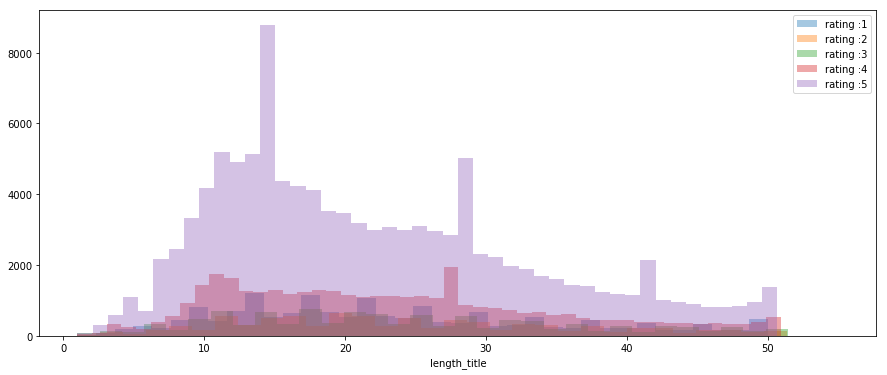

In [31]:
%matplotlib inline
plt.figure(figsize = (15,6))
for i in [1,2,3,4,5]:
    z = df[df.rating == i]
    sns.distplot(z.length_title,kde = False,label=("rating :" + str(i) ))
    plt.legend()
#     plt.ylim(0,15000)

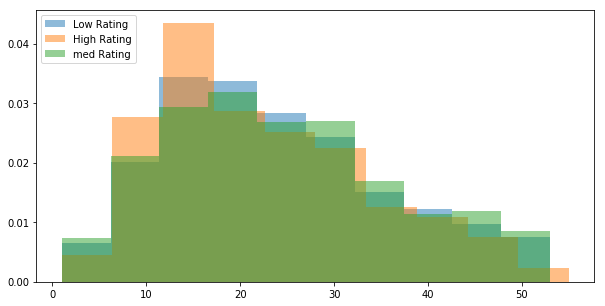

In [32]:
plt.figure(figsize = (10,5))
plt.hist(df[(df.rating <=2) ]['length_title'],alpha = 0.5,normed = True,label = 'Low Rating')
plt.hist(df[(df.rating >=4)]['length_title'],alpha = 0.5,normed = True,label = 'High Rating')
plt.hist(df[(df.rating ==3)]['length_title'],alpha = 0.5,normed = True,label = 'med Rating')
plt.legend(loc = 'upper left')
plt.show()

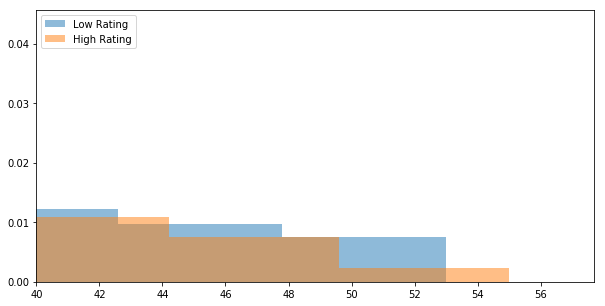

In [33]:
plt.figure(figsize = (10,5))
plt.hist(df[(df.rating <=2) ]['length_title'],alpha = 0.5,normed = True,label = 'Low Rating')
plt.hist(df[(df.rating >=4)]['length_title'],alpha = 0.5,normed = True,label = 'High Rating')
# plt.hist(df[(df.rating ==3)]['length_title'],alpha = 0.5,normed = True,label = 'med Rating')
plt.legend(loc = 'upper left')
plt.xlim(40,)
plt.show()

We can see as we are going right low rating bar is going up, means low rating customes write more than happy customers

## Lets see the same analysis in comment length

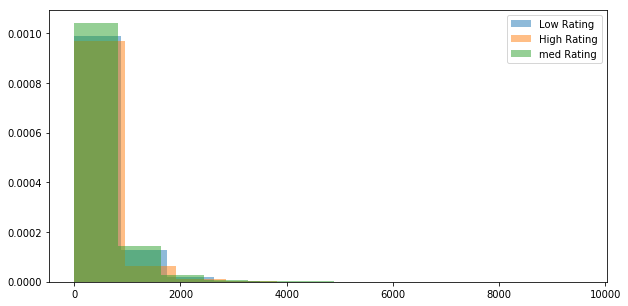

In [34]:
plt.figure(figsize = (10,5))
plt.hist(df[(df.rating <=2) ]['length_comment'],alpha = 0.5,normed = True,label = 'Low Rating')
plt.hist(df[(df.rating >=4)]['length_comment'],alpha = 0.5,normed = True,label = 'High Rating')
plt.hist(df[(df.rating ==3)]['length_comment'],alpha = 0.5,normed = True,label = 'med Rating')
plt.legend(loc = 'upper right')
plt.show()

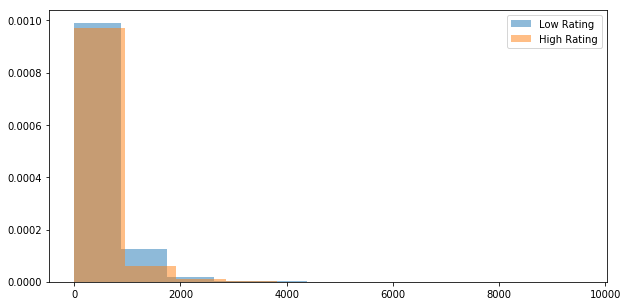

In [35]:
plt.figure(figsize = (10,5))
plt.hist(df[(df.rating <=2) ]['length_comment'],alpha = 0.5,normed = True,label = 'Low Rating')
plt.hist(df[(df.rating >=4)]['length_comment'],alpha = 0.5,normed = True,label = 'High Rating')
# plt.hist(df[(df.rating ==3)]['length_comment'],alpha = 0.5,normed = True,label = 'med Rating')
plt.legend(loc = 'upper right')
plt.show()

Same thing we can see from this chart too. 

### Create feature for % of text that is punctuation


In [36]:
import string

def cont_punc(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

In [37]:
df.columns

Index(['sku', 'id', 'rating', 'title', 'comment', 'length_title',
       'length_comment'],
      dtype='object')

In [38]:
# High ratings have less punctuation than low ratings: hypothesis
df['punc%_title'] = df['title'].apply(lambda x:cont_punc(str(x)))
df['punc%_comment'] = df['comment'].apply(lambda x:cont_punc(str(x)))

In [39]:
df.head(2)

,sku,id,rating,title,comment,length_title,length_comment,punc%_title,punc%_comment
0,1208844,3235310,1.0,Do not buy,"I accidentally bought this before realizing I swore never to buy netgear again. As with my prior netgear experience four years ago, installation was a nightmare. The setup software couldnt even get past the first stage. After getting dropped twice by telephone customer support, everything went unceremoniously into a garbage bag to be taken back to Best Buy. Cnet rates this as poor as well.",10,392,0.0,2.1
1,1208844,3243408,5.0,Swells speed.,Good speed this replaced my older modem be ause I wanted to down load net flicks. It does it perfectly. Inhaven't noticed a huge increase in range but speed advantage. I would recommend i,13,187,8.3,2.6


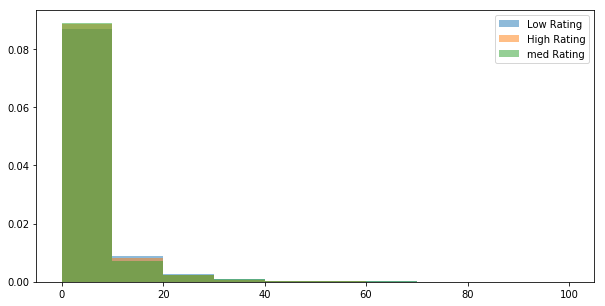

In [40]:
# lets see the plots
plt.figure(figsize = (10,5))
plt.hist(df[(df.rating <=2) ]['punc%_title'],alpha = 0.5,normed = True,label = 'Low Rating')
plt.hist(df[(df.rating >=4)]['punc%_title'],alpha = 0.5,normed = True,label = 'High Rating')
plt.hist(df[(df.rating ==3)]['punc%_title'],alpha = 0.5,normed = True,label = 'med Rating')
plt.legend(loc = 'upper right')
plt.show()

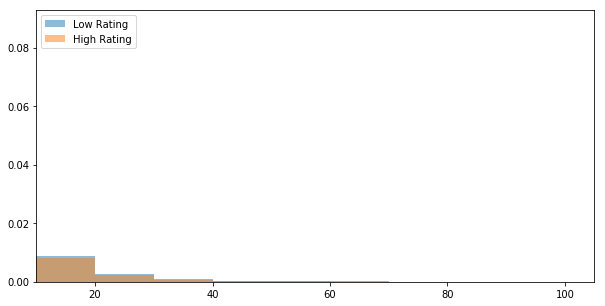

In [41]:
# lets see the plots
plt.figure(figsize = (10,5))
plt.hist(df[(df.rating <=2) ]['punc%_title'],alpha = 0.5,normed = True,label = 'Low Rating')
plt.hist(df[(df.rating >=4)]['punc%_title'],alpha = 0.5,normed = True,label = 'High Rating')
# plt.hist(df[(df.rating ==3)]['punc%_title'],alpha = 0.5,normed = True,label = 'med Rating')
plt.legend(loc = 'upper left')
plt.xlim(10,)
plt.show()

Slightly more fot low ratings in title let see for comment

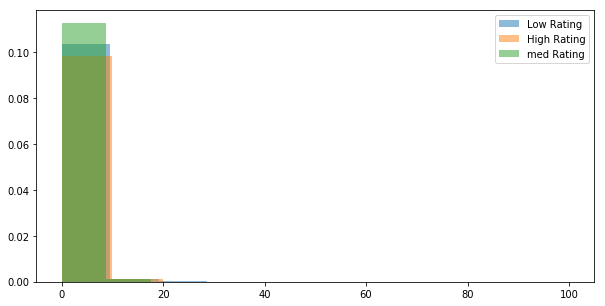

In [42]:
# lets see the plots
plt.figure(figsize = (10,5))
plt.hist(df[(df.rating <=2) ]['punc%_comment'],alpha = 0.5,normed = True,label = 'Low Rating')
plt.hist(df[(df.rating >=4)]['punc%_comment'],alpha = 0.5,normed = True,label = 'High Rating')
plt.hist(df[(df.rating ==3)]['punc%_comment'],alpha = 0.5,normed = True,label = 'med Rating')
plt.legend(loc = 'upper right')
plt.show()

# Lets perform the analysis

In [72]:
df.columns

Index(['sku', 'id', 'rating', 'title', 'comment', 'length_title',
       'length_comment', 'punc%_title', 'punc%_comment', 'clean_title',
       'clean_comment', 'title_token', 'comment_token', 'title_token_nostop',
       'comment_token_nostop', 'title_token_nostop_stemmed',
       'comment_token_nostop_stemmed', 'title_token_nostop_lemm',
       'comment_token_nostop_lemm', 'cleaned_title', 'cleaned_comment'],
      dtype='object')

In [76]:
def clean_text(text):
    text = "".join([str(word).lower() for word in str(text) if str(word) not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf_title = tfidf_vect.fit_transform(df.title)
# X_tfidf_comment = tfidf_vect.fit_transform(df.comment)

X_features = pd.concat([df[['length_title','length_comment','punc%_title','punc%_comment']], pd.DataFrame(X_tfidf_title.toarray())], axis=1)
X_features.head()

,length_title,length_comment,punc%_title,punc%_comment,0,1,2,3,4,5,...,17414,17415,17416,17417,17418,17419,17420,17421,17422,17423
0,10,392,0.0,2.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13,187,8.3,2.6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,330,0.0,10.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22,1020,5.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25,406,4.5,3.6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for i in [1,2,3,4,5]:
    plt.hist((df['punc%_title'])**(1/i),bins = 40)
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show

In [67]:
list(df.columns)

['sku',
 'id',
 'rating',
 'title',
 'comment',
 'length_title',
 'length_comment',
 'punc%_title',
 'punc%_comment',
 'clean_title',
 'clean_comment',
 'title_token',
 'comment_token',
 'title_token_nostop',
 'comment_token_nostop',
 'title_token_nostop_stemmed',
 'comment_token_nostop_stemmed',
 'title_token_nostop_lemm',
 'comment_token_nostop_lemm']